MSE       : 0.0180
MAE       : 0.1160
RMSE      : 0.1343
R^2       : 0.9995
ADJ R^2   : 0.9994


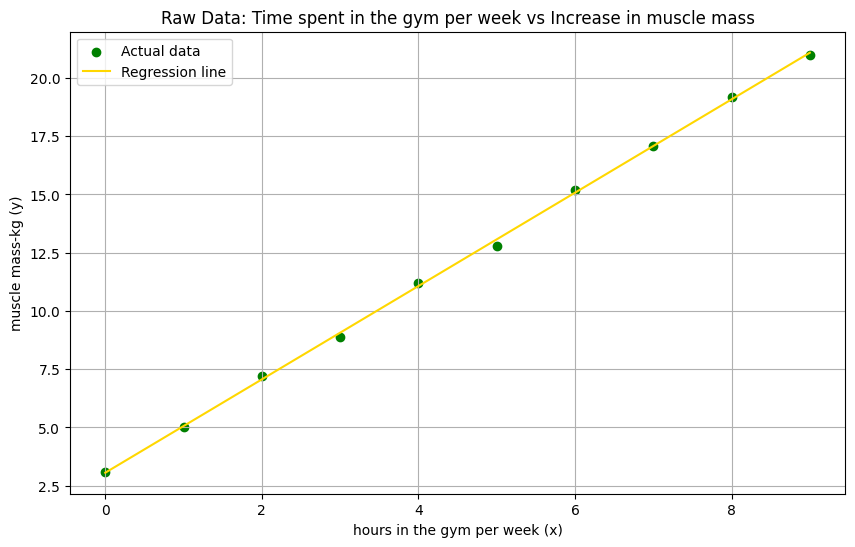

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# data in np array - תרגיל 1
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([3.1, 5.0, 7.2, 8.9, 11.2, 12.8, 15.2, 17.1, 19.2, 21.0])

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual data', color='green')
plt.plot(x, model.predict(x), color='gold', label='Regression line')
plt.xlabel("hours in the gym per week (x)")
plt.ylabel("muscle mass-kg (y)")
plt.title("Raw Data: Time spent in the gym per week vs Increase in muscle mass")
plt.grid(True)
plt.legend()

# Create regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


# evaluation - calculate
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)
    
mse_linear = mean_squared_error(y, y_pred)
mae_linear = mean_absolute_error(y, y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y, y_pred)

adj_r2 = adjusted_r2(r2_linear, n=len(y), p=X.shape[1])
print(f"MSE       : {mse_linear:.4f}")
print(f"MAE       : {mae_linear:.4f}")
print(f"RMSE      : {rmse_linear:.4f}")
print(f"R^2       : {r2_linear:.4f}")
print(f"ADJ R^2   : {adj_r2:.4f}")

plt.show()

optimal is 1.3991000529380615 , [5.58869984]
train MSE       : 0.616997
train MAE       : 0.593072
train RMSE      : 0.785492
train R^2       : 0.987245
train ADJ R^2   : 0.985119

test MSE       : 6.092217
test MAE       : 2.203128
test RMSE      : 2.468242
test R^2       : 0.945138


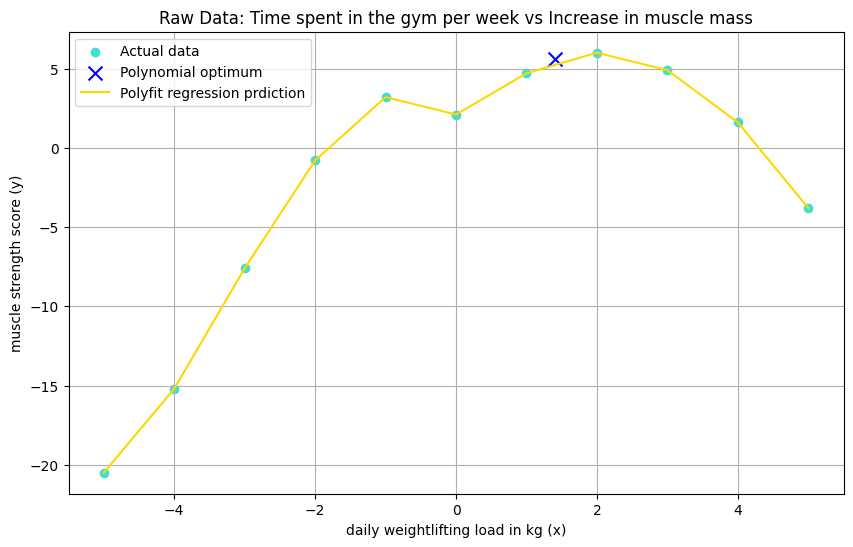

In [12]:
# create the model - linear regression + fit + predict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([-20.5, -15.2, -7.6, -0.8, 3.2, 2.1, 4.7, 6.0, 4.9, 1.6, -3.8])


polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
polynomial_model.fit(x, y)
y_pred_linear = polynomial_model.predict(x)

# poly -- find optimal
# -b / 2a
coefs = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_
#                b2     b1   i 
c = intercept  # Ax^2 + Bx + C
b = coefs[1]
a = coefs[2]
x_opt = -b / (2 * a)
y_opt =  polynomial_model.predict([[x_opt]])

print(f"optimal is {x_opt} , {y_opt}")

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual data', color='turquoise')
plt.scatter([x_opt], [y_opt], marker='x', s=100, color='blue', label='Polynomial optimum')
plt.plot(x, y, label="Polyfit regression prdiction", color='gold')
plt.xlabel("daily weightlifting load in kg (x)")
plt.ylabel("muscle strength score (y)")
plt.title("Raw Data: Time spent in the gym per week vs Increase in muscle mass")
plt.grid(True)
plt.legend()

#  Split the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

polynomial_model.fit(X_train, y_train)
y_pred_linear_train = polynomial_model.predict(X_train)
y_pred_linear_test = polynomial_model.predict(X_test)

### evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)

# Predict for both train and test sets
# Calculate and report MSE, MAE, RMSE, R² for the dataset

# train
def print_evaluation(y_calc, true_y, msg):
    mse_linear = mean_squared_error(true_y, y_calc)
    mae_linear = mean_absolute_error(true_y, y_calc)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(true_y, y_calc)
    print(f"{msg} MSE       : {mse_linear:.6f}")
    print(f"{msg} MAE       : {mae_linear:.6f}")
    print(f"{msg} RMSE      : {rmse_linear:.6f}")
    print(f"{msg} R^2       : {r2_linear:.6f}")
    return r2_linear

r2_linear = print_evaluation(y_pred_linear_train, y_train, 'train')

adj_r2 = adjusted_r2(r2_linear, n=len(y_train), p=X.shape[1])
print(f"train ADJ R^2   : {adj_r2:.6f}")

# test
print()
print_evaluation(y_pred_linear_test, y_test, 'test')


plt.show()